# Neural Networks (NN)

NNs are a hot topic not only in academia but also in big tech comanies, such as Google, Facebook, Amazon, etc.<br>

### Learning outcomes

- real-world applications.
- solving the wrong problem.
- single- and multi-layer NN.
- train a NN for handwritten image classification.
- convolutional NN.
- group activity (if time allows).

### Part 1: Real-world applications

[i] Facebook's DeepFace for tagging images <br>
[source](https://en.wikipedia.org/wiki/DeepFace); [paper](https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf)
- a deep learning facial recognition system.
- identifies human faces in digital images.
- uses a nine-layer NN with over 120 million connection weights.
- was trained on 4 million images uploaded by Facebook users.
- Facebook's DeepFace method accuracy: 97.35% (compared with FBI's Next Generation Identification system: 85%).

[ii] Skin cancer classification <br>
[source](https://cs.stanford.edu/people/esteva/nature/); [paper](https://www.nature.com/articles/nature21056)
- a deep learning system trained to classify images of skin lessions as benign lesions or malignant skin cancers.
- achives the accuracy of board-certified dermatologists.
- pretain a deep neural network at general object recognition.
- fine-tuned it on a dataset of ~130,000 skin lesion images comprised of over 2,000 diseases.

`Other examples`

[iii] Learning how to drive in dense traffic from camera video streams <br>
[source](https://www.youtube.com/watch?v=X2s7gy3wIYw); [paper](https://arxiv.org/abs/1901.02705)

[iv] Google's neural machine translation <br>
[source](https://en.wikipedia.org/wiki/Google_Neural_Machine_Translation); [paper](https://arxiv.org/abs/1609.08144)

<br>

### Part 2: Solving the wrong problem
[source](https://physicsworld.com/a/neural-networks-explained/)

[i] "Roberto Novoa, a clinical dermatologist at Stanford University (re: part II, example (ii)), has described a time when he and his colleagues designed an algorithm to recognize skin cancer – only to discover that they’d accidentally designed a ruler detector instead, because the largest tumours had been photographed with rulers next to them for scale". <br>

[ii] "Another group, this time at the University of Washington, demonstrated a deliberately bad algorithm that was, in theory, supposed to classify husky dogs and wolves, but actually functioned as a snow detector: they’d trained their algorithm with a dataset in which most of the wolf pictures had snowy backgrounds".

### Part 3: Basic concepts in NNs

- single-layer NN: a single layer between the input and output nodes.
- multi-layer NN: can add any number of hidden layers between between the input and output nodes.
- artificial neurons represent the building blocks of the multi-layer NNs.
- [a neat explanation of a basic multi-layer NN](https://www.youtube.com/watch?v=aircAruvnKk&t=1011s).


### Part 4: Classifying handwritten digits

[paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf); [source](https://www.packtpub.com/data/python-machine-learning-third-edition)

We will implement single-layer and multi-layer NNs to clasify handwritten digits from the popular Mixed National Institute of Standards and Technology (MNIST) dataset.


##### Step 1: Import packages

We will introduce a new Python library, Theano, for working with NN. Theano is a popular choice for NN as the same code can be run on either CPUs or GPUs. GPUs greatly speed up the training and prediction, and is readily available. Amazon even offers GPU machines on EC2. 

If you'd like to go deeper into Theano, you may want to read this paper: http://www.iro.umontreal.ca/~lisa/pointeurs/theano_scipy2010.pdf

Install Theano if you haven't already.  Then let's load it, and set it to work with a CPU.  For reference, here is the Theano documentation: http://www.deeplearning.net/software/theano/library/

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time

import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from theano.tensor.nnet.conv import conv2d
from theano.tensor.signal.pool import max_pool_2d_same_size as max_pool_2d
print (theano.config.device )# We're using CPUs (for now)
print (theano.config.floatX )# Should be 64 bit for CPUs

%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\cilin\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


cpu
float64


##### Step 2: Define functions

In [3]:
def _onehot(y, n_classes):
    """Encode labels into one-hot representation

    Parameters
    ------------
    y : array, shape = [n_examples]
        Target values.

    Returns
    -----------
    onehot : array, shape = (n_examples, n_labels)

    """

    onehot = np.zeros((n_classes, y.shape[0]))
    for idx, val in enumerate(y.astype(int)):
        onehot[val, idx] = 1.
    return onehot.T

your homework: comment the following functions following the example above

In [2]:
def print_min_max(dat):
    """
    
    """
    print(dat.min())
    print(dat.max())

In [4]:
def model_1(X, w):
    """
    
    """
    return T.nnet.softmax(T.dot(X, w))

In [5]:
def model_2(X, w_1, w_2):
    """
    
    """
    return T.nnet.softmax(T.dot(T.nnet.sigmoid(T.dot(X, w_1)), w_2))

In [6]:
def model_3(X, w_1, w_2, w_3):
    """
    
    """
    return T.nnet.softmax(T.dot(T.nnet.sigmoid(T.dot(T.nnet.sigmoid(T.dot(X, w_1)), w_2)), w_3))

In [7]:
def model_rectifier(X, w_1, w_2):
    """
    
    """
    return T.nnet.softmax(T.dot(T.maximum(T.dot(X, w_1), 0.), w_2))

In [8]:
def model_dropout_1(X, w_1, w_2, p_1, p_2):
    """
    
    """
    return T.nnet.softmax(T.dot(dropout(T.maximum(T.dot(dropout(X, p_1), w_1),0.), p_2), w_2))

In [9]:
def model_dropout_2(X, w_1, w_2, w_3, p_1, p_2, p_3):
    """
    
    """
    return T.nnet.softmax(T.dot(dropout(T.maximum(T.dot(dropout(T.maximum(T.dot(dropout(X, p_1), w_1),0.), p_2), w_2),0.), p_3), w_3))

In [10]:
# Theano provides built-in support for add convolutional layers
def model_convonet(X, w_1, w_2, w_3, w_4, w_5, p_1, p_2):
    """
    
    """
    l1 = dropout(max_pool_2d(T.maximum(conv2d(X, w_1, border_mode='full'),0.), (2, 2)), p_1)
    l2 = dropout(max_pool_2d(T.maximum(conv2d(l1, w_2), 0.), (2, 2)), p_1)
    l3 = dropout(T.flatten(max_pool_2d(T.maximum(conv2d(l2, w_3), 0.), (2, 2)), outdim=2), p_1) # flatten to switch back to 1d layers
    l4 = dropout(T.maximum(T.dot(l3, w_4), 0.), p_2)
    return T.nnet.softmax(T.dot(l4, w_5))

In [11]:
def dropout(X, p=0.):
    """
    
    """
    if p > 0:
        X *= srng.binomial(X.shape, p=1 - p)
        X /= 1 - p
    return X

In [12]:
def gradientDescentBatch(epochs):
    """
    
    """
    trainTime = 0.0
    predictTime = 0.0
    for i in range(epochs):
        start_time = time.time()
        cost = train(X_train[0:len(X_train)], y_train_b[0:len(X_train)])
        trainTime =  trainTime + (time.time() - start_time)
        print ('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(y_test_b, axis=1) == predict(X_test))))
    print ('train time = %.2f' %(trainTime))

In [13]:
def gradientDescentStochastic(epochs):
    """
    
    """
    trainTime = 0.0
    predictTime = 0.0
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(X_train), miniBatchSize), range(miniBatchSize, len(X_train), miniBatchSize)):
            cost = train(X_train[start:end], y_train_b[start:end])
        trainTime =  trainTime + (time.time() - start_time)
        print ('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(y_test_b, axis=1) == predict(X_test)))  )   
    print ('train time = %.2f' %(trainTime))

In [14]:
def backprop(cost, w):
    """
    
    """
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha])
    return updates

In [15]:
def backprop_convonet(cost, w, alpha=0.001, rho=0.9, epsilon=1e-6):
    """
    
    """
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        
        # adding gradient scaling
        acc = theano.shared(w1.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * grad ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        grad = grad / gradient_scaling
        updates.append((acc, acc_new))
        
        updates.append((w1, w1 - grad * alpha))
    return updates

##### Step 3: Read the MNIST dataset from the sklearn package

The images in the MNIST dataset consist of 28 × 28 pixels. The first array returned by the fetch_openml function contains the 28 x 28 pixel images unrolled into 784 one-dimensional row vectors. The second array contains the the class labels (integers 0-9) of the handwritten digits.

In [16]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

y = y.astype(int)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Gradient-based optimization is much more stable under normalization, thus we want to normalize the pixel values in MNIST to the range -1 to 1 (originally 0 to 255).

In [17]:
print("Pixel range before normalization")
print_min_max(X)

print("Pixel range after normalization")
X = ((X / 255.0) - .5) * 2
print_min_max(X)

Pixel range before normalization
0.0
255.0
Pixel range after normalization
-1.0
1.0


We now create our training and test datasets. Let's cut the data for now, will make it easier to work with it. We will keep only 2,400 images.

In [18]:
shuffle = np.random.permutation(np.arange(2400))
X, y = X[shuffle], y[shuffle]

X_train, X_test, y_train, y_test = \
    train_test_split(
        X, y, test_size=400, 
        random_state=123, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 784)
(400, 784)
(2000,)
(400,)


Let's now get an idea of how the images (digits 0-9) in the MNIST dataset look like.

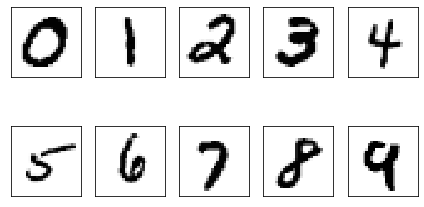

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Let's also plot multiple examples of the same digit to see how different the handwritting for each really is

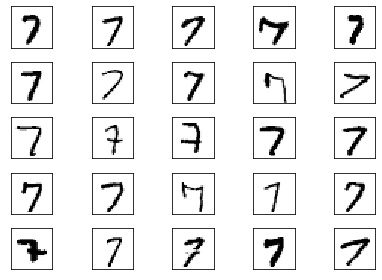

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

##### Step 4: Implementing a single-layer NN 
Let's prepare a variation of the label data.  Let's make these labels, rather than each being an integer value from 0-9, be a set of 10 binary values, one for each class.  This is sometimes called a 1-of-n encoding, and it makes working with NN easier, as there will be one output node for each class.

In [21]:
n_classes = 10
y_train_b = _onehot(y_train, n_classes)
y_test_b = _onehot(y_test, n_classes)

# temporary transformation to df for visualization purposes
temp = pd.DataFrame(y_train_b)
temp.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Lets start with a KNN model to establish a baseline accuracy.

Exercise: You've seen a number of different classification algorithms (e.g. naive bayes, decision trees, random forests, logistic regression) at this point.  How does KNN scalability and accuracy with respect to the size of the training dataset compare to those other algorithms?  

In [22]:
neighbors = 1

knn = KNeighborsClassifier(neighbors)
start_time = time.time()
knn.fit(X_train, y_train)
print ('Train time = %.2f' %(time.time() - start_time))

start_time = time.time()
accuracy = knn.score(X_test, y_test)
print ('Accuracy = %.4f' %(accuracy))
print ('Prediction time = %.2f' %(time.time() - start_time))

Train time = 0.05
Accuracy = 0.9025
Prediction time = 0.92


Alright, now that we have a simple baseline, let's start working in Theano. Before we jump to multi-layer neural networks though, let's train a **logistic regression** model to make certain we're using Theano correctly. <br>
Recall from Josh's regression lecture the four key components: (1) parameters, (2) model, (3) cost function, and (4) objective. 

In [23]:
## (1) Parameters 
# Initialize the weights to small, but non-zero, values.
num_features = X_train[1].size
num_classes = y_train_b[1].size
w = theano.shared(np.asarray((np.random.randn(*(num_features, num_classes))*.01)))

# temporary transformation to df for visualization purposes
temp = pd.DataFrame(w.eval())
print(temp.shape)
temp.head()

(784, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.006061,0.020094,-0.000370,-0.008102,0.017610,0.012713,-0.016785,0.003765,0.010361,-0.004268
1,-0.000548,-0.003430,-0.006102,-0.000695,0.007819,0.005506,-0.001824,0.001600,-0.027041,0.003832
2,0.001560,-0.003618,-0.003434,0.003011,-0.005941,0.000814,-0.008698,0.002247,0.012093,-0.001569
3,0.001172,0.000248,0.002776,0.007061,-0.002175,-0.011460,0.003106,-0.005588,0.000177,0.001883
4,0.005020,0.011772,-0.015234,0.010951,-0.001272,0.008149,0.011437,0.013174,-0.007232,-0.010999


Two notes relevant at this point: <br>

First, logistic regression can be thought of as a neural network with no hidden layers. The output values are just the dot product of the inputs and the edge weights. <br>

Second, we have 10 classes. We can either train separate one vs all classifiers using sigmoid activation, which would be a hassle, or we can use the **softmax activation**, which is essentially a multi-class version of sigmoid. We'll use Theano's built-in implementation of softmax.

In [25]:
## (2) Model
# Theano objects accessed with standard Python variables
X = T.matrix()
y = T.matrix()

# label prediction
y_hat = model_1(X, w)

We'll use **cross-entropy** (a.k.a, log loss) as a cost function.  Cross-entropy only considers the error between the true class and the prediction, and not the errors for the false classes.  This tends to cause the network to converge faster.  We'll use Theano's built-in cross entropy function.

In [26]:
## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))

The objective is minimize the cost, and to do that we'll use **batch gradient descent**.

Exercise: What are the differences between batch, stochastic, and mini-batch gradient descent?  What are the implications of each for working on large datasets?

We'll use Theano's built-in gradient function.  Exercise: Do you recall from Josh's lecture what the gradient is for beta in logistic regression?

In [27]:
## (4) Objective (and solver)

alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run batch gradient descent
gradientDescentBatch(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.1825
2) accuracy = 0.3225
3) accuracy = 0.3925
4) accuracy = 0.4300
5) accuracy = 0.4650
6) accuracy = 0.4975
7) accuracy = 0.5400
8) accuracy = 0.5775
9) accuracy = 0.6050
10) accuracy = 0.6225
11) accuracy = 0.6425
12) accuracy = 0.6625
13) accuracy = 0.6650
14) accuracy = 0.6825
15) accuracy = 0.6850
16) accuracy = 0.6975
17) accuracy = 0.7025
18) accuracy = 0.7150
19) accuracy = 0.7200
20) accuracy = 0.7225
21) accuracy = 0.7250
22) accuracy = 0.7300
23) accuracy = 0.7350
24) accuracy = 0.7350
25) accuracy = 0.7375
26) accuracy = 0.7450
27) accuracy = 0.7500
28) accuracy = 0.7500
29) accuracy = 0.7525
30) accuracy = 0.7550
31) accuracy = 0.7550
32) accuracy = 0.7575
33) accuracy = 0.7625
34) accuracy = 0.7650
35) accuracy = 0.7700
36) accuracy = 0.7725
37) accuracy = 0.7725
38) accuracy = 0.7750
39) accuracy = 0.7775
40) accuracy = 0.7800
41) accuracy = 0.7825
42) accuracy = 0.7850
43) accuracy = 0.7875
44) accuracy = 0.7875
45) accuracy = 0.7875
46) accuracy = 0.79

Exercise:  What do you expect to happen if we convert batch gradient descent to stochastic gradient descent?  Why?

Let's try it...

In [28]:
## (1) Parameters 
# Initialize the weights to small, but non-zero, values.
num_features = X_train[1].size
num_classes = y_train_b[1].size
w = theano.shared(np.asarray((np.random.randn(*(num_features, num_classes))*.01)))

# temporary transformation to df for visualization purposes
temp = pd.DataFrame(w.eval())
print(temp.shape)
temp.head()


## (2) Model
# Theano objects accessed with standard Python variables
X = T.matrix()
y = T.matrix()

# label prediction
y_hat = model_1(X, w)


## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))


## (4) Objective (and solver)
alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent function
miniBatchSize = 1 
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

(784, 10)
1) accuracy = 0.7875
2) accuracy = 0.8300
3) accuracy = 0.8775
4) accuracy = 0.8725
5) accuracy = 0.8550
6) accuracy = 0.8750
7) accuracy = 0.8650
8) accuracy = 0.8625
9) accuracy = 0.8600
10) accuracy = 0.8600
11) accuracy = 0.8500
12) accuracy = 0.8625
13) accuracy = 0.8600
14) accuracy = 0.8600
15) accuracy = 0.8575
16) accuracy = 0.8525
17) accuracy = 0.8625
18) accuracy = 0.8650
19) accuracy = 0.8625
20) accuracy = 0.8600
21) accuracy = 0.8575
22) accuracy = 0.8600
23) accuracy = 0.8625
24) accuracy = 0.8625
25) accuracy = 0.8625
26) accuracy = 0.8625
27) accuracy = 0.8650
28) accuracy = 0.8650
29) accuracy = 0.8675
30) accuracy = 0.8675
31) accuracy = 0.8625
32) accuracy = 0.8625
33) accuracy = 0.8650
34) accuracy = 0.8650
35) accuracy = 0.8675
36) accuracy = 0.8675
37) accuracy = 0.8675
38) accuracy = 0.8675
39) accuracy = 0.8675
40) accuracy = 0.8700
41) accuracy = 0.8700
42) accuracy = 0.8700
43) accuracy = 0.8700
44) accuracy = 0.8700
45) accuracy = 0.8700
46) accur

Exercise: What do you expect to happen if you switch the batch size to be great than 1 (i.e. mini-batch)?  Why?

Try it for a few values...

In [29]:
## (1) Parameters 
# Initialize the weights to small, but non-zero, values.
num_features = X_train[1].size
num_classes = y_train_b[1].size
w = theano.shared(np.asarray((np.random.randn(*(num_features, num_classes))*.01)))

# temporary transformation to df for visualization purposes
temp = pd.DataFrame(w.eval())
print(temp.shape)
temp.head()

## (2) Model
# Theano objects accessed with standard Python variables
X = T.matrix()
y = T.matrix()

# label prediction
y_hat = model_1(X, w)

## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))

## (4) Objective (and solver)
alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 10
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

(784, 10)
1) accuracy = 0.8150
2) accuracy = 0.8475
3) accuracy = 0.8600
4) accuracy = 0.8600
5) accuracy = 0.8625
6) accuracy = 0.8625
7) accuracy = 0.8625
8) accuracy = 0.8700
9) accuracy = 0.8750
10) accuracy = 0.8750
11) accuracy = 0.8750
12) accuracy = 0.8700
13) accuracy = 0.8675
14) accuracy = 0.8675
15) accuracy = 0.8675
16) accuracy = 0.8650
17) accuracy = 0.8675
18) accuracy = 0.8700
19) accuracy = 0.8750
20) accuracy = 0.8775
21) accuracy = 0.8775
22) accuracy = 0.8800
23) accuracy = 0.8800
24) accuracy = 0.8800
25) accuracy = 0.8825
26) accuracy = 0.8825
27) accuracy = 0.8825
28) accuracy = 0.8825
29) accuracy = 0.8825
30) accuracy = 0.8825
31) accuracy = 0.8825
32) accuracy = 0.8800
33) accuracy = 0.8800
34) accuracy = 0.8800
35) accuracy = 0.8800
36) accuracy = 0.8800
37) accuracy = 0.8800
38) accuracy = 0.8800
39) accuracy = 0.8775
40) accuracy = 0.8800
41) accuracy = 0.8800
42) accuracy = 0.8800
43) accuracy = 0.8800
44) accuracy = 0.8800
45) accuracy = 0.8800
46) accur

##### Step 4: Implementing a multi-layer NN

We'll now implement a multi-layer perceptron to clasify the images in the MNIST dataset. Let's keep things simple for the moment, and implement a multi-layer NN with only one hidden layer, making it a two layer NN. <br>

Because we have a hidden layer, we will now train the model using **backpropagation**. 

As we start to get further into NN, if you'd like to take time on your own for an in-depth introduction on the state of the art in the topic, check out this excellent 1-day tutorial from KDD2014:

Part 1: http://videolectures.net/kdd2014_bengio_deep_learning/

Part 2: http://videolectures.net/tcmm2014_taylor_deep_learning/

In [30]:
## (1) Parameters
num_hidden_nodes = 784
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2]


## (2) Model
X = T.matrix()
Y = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid

# label prediction
y_hat = model_2(X, w_1, w_2)


## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.7100
2) accuracy = 0.8275
3) accuracy = 0.8575
4) accuracy = 0.8600
5) accuracy = 0.8650
6) accuracy = 0.8675
7) accuracy = 0.8700
8) accuracy = 0.8775
9) accuracy = 0.8725
10) accuracy = 0.8750
11) accuracy = 0.8775
12) accuracy = 0.8750
13) accuracy = 0.8800
14) accuracy = 0.8825
15) accuracy = 0.8825
16) accuracy = 0.8850
17) accuracy = 0.8825
18) accuracy = 0.8825
19) accuracy = 0.8825
20) accuracy = 0.8825
21) accuracy = 0.8825
22) accuracy = 0.8850
23) accuracy = 0.8850
24) accuracy = 0.8850
25) accuracy = 0.8850
26) accuracy = 0.8850
27) accuracy = 0.8825
28) accuracy = 0.8825
29) accuracy = 0.8825
30) accuracy = 0.8850
31) accuracy = 0.8825
32) accuracy = 0.8775
33) accuracy = 0.8775
34) accuracy = 0.8800
35) accuracy = 0.8825
36) accuracy = 0.8825
37) accuracy = 0.8825
38) accuracy = 0.8850
39) accuracy = 0.8850
40) accuracy = 0.8875
41) accuracy = 0.8875
42) accuracy = 0.8900
43) accuracy = 0.8900
44) accuracy = 0.8900
45) accuracy = 0.8900
46) accuracy = 0.89

Exercise: Change the number of nodes in the hidden layer?  What do you expect the impact to be?  What is the impact?

In [32]:
## (1) Parameters
num_hidden_nodes = 500
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2]


## (2) Model
X = T.matrix()
Y = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid

# label prediction
y_hat = model_2(X, w_1, w_2)


## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.7050
2) accuracy = 0.8200
3) accuracy = 0.8550
4) accuracy = 0.8575
5) accuracy = 0.8650
6) accuracy = 0.8675
7) accuracy = 0.8675
8) accuracy = 0.8675
9) accuracy = 0.8700
10) accuracy = 0.8700
11) accuracy = 0.8700
12) accuracy = 0.8750
13) accuracy = 0.8775
14) accuracy = 0.8775
15) accuracy = 0.8825
16) accuracy = 0.8875
17) accuracy = 0.8825
18) accuracy = 0.8800
19) accuracy = 0.8800
20) accuracy = 0.8800
21) accuracy = 0.8775
22) accuracy = 0.8800
23) accuracy = 0.8800
24) accuracy = 0.8825
25) accuracy = 0.8850
26) accuracy = 0.8850
27) accuracy = 0.8850
28) accuracy = 0.8875
29) accuracy = 0.8875
30) accuracy = 0.8875
31) accuracy = 0.8900
32) accuracy = 0.8900
33) accuracy = 0.8925
34) accuracy = 0.8925
35) accuracy = 0.8925
36) accuracy = 0.8900
37) accuracy = 0.8900
38) accuracy = 0.8900
39) accuracy = 0.8900
40) accuracy = 0.8900
41) accuracy = 0.8900
42) accuracy = 0.8900
43) accuracy = 0.8925
44) accuracy = 0.8925
45) accuracy = 0.8925
46) accuracy = 0.89

Exercise:  We saw an improvement from adding a hidden layer.  What do you expect to happen if a second hidden layer was added?  

Let's try it...

In [36]:
## (1) Parms
num_hidden_nodes = 600 
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_hidden_nodes))*.01)))
w_3 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2, w_3]

## (2) Model
X = T.matrix()
Y = T.matrix()

# label prediction
y_hat = model_3(X, w_1, w_2, w_3)


## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1 
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.0950
2) accuracy = 0.0950
3) accuracy = 0.0950
4) accuracy = 0.0950
5) accuracy = 0.0950
6) accuracy = 0.0950
7) accuracy = 0.1600
8) accuracy = 0.1100
9) accuracy = 0.1100
10) accuracy = 0.1475
11) accuracy = 0.2200
12) accuracy = 0.3325
13) accuracy = 0.4000
14) accuracy = 0.5025
15) accuracy = 0.5925
16) accuracy = 0.6525
17) accuracy = 0.6975
18) accuracy = 0.7300
19) accuracy = 0.7725
20) accuracy = 0.7875
21) accuracy = 0.7825
22) accuracy = 0.7950
23) accuracy = 0.7900
24) accuracy = 0.8000
25) accuracy = 0.8125
26) accuracy = 0.8225
27) accuracy = 0.8425
28) accuracy = 0.8475
29) accuracy = 0.8500
30) accuracy = 0.8600
31) accuracy = 0.8650
32) accuracy = 0.8725
33) accuracy = 0.8675
34) accuracy = 0.8675
35) accuracy = 0.8650
36) accuracy = 0.8675
37) accuracy = 0.8700
38) accuracy = 0.8625
39) accuracy = 0.8650
40) accuracy = 0.8650
41) accuracy = 0.8675
42) accuracy = 0.8750
43) accuracy = 0.8825
44) accuracy = 0.8800
45) accuracy = 0.8825
46) accuracy = 0.88



As interest in networks with more layers and more complicated architechures has increased, a couple of tricks have emerged and become standard practice. Let's look at two of those--**rectifier activation** and **dropout noise**.

#### Activation Revisted

Exercise: What is an activation function? What are common activation functions used in NN?

Let's look at a recent idea around activation closely associated with deep learning.  In 2010, in a paper published at NIPS (https://www.utc.fr/~bordesan/dokuwiki/_media/en/glorot10nipsworkshop.pdf), Yoshua Bengio showed that *rectifier activation works better empirically than sigmoid activation when used in the hidden layers*.  

The rectifier activation is simple: f(x)=max(0,x).  Intuitively, the difference is that as a sigmoid activated node approaches 1 it stops learning even if error continues to be propagated to it, whereas the rectifier activated node continue to learn (at least in the positive direction).  It is not completely understood (per Yoshua Bengio) why this helps, but there are some theories being explored including as related to the benefits of sparse representations in networks. (http://www.iro.umontreal.ca/~bengioy/talks/KDD2014-tutorial.pdf).  **Rectifiers also speed up training**.

Although the paper was published in 2010, the technique didn't gain widespread adoption until 2012 when members of Hinton's group spread the word, including with this Kaggle entry: http://blog.kaggle.com/2012/11/01/deep-learning-how-i-did-it-merck-1st-place-interview/

<br>
<br>

Let's change the activation in our 2 layer network to rectifier and see what happens...

In [38]:
## (1) Parms
num_hidden_nodes = 784 
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2]


## (2) Model
X = T.matrix()
Y = T.matrix()

# label prediction
y_hat = model_rectifier(X, w_1, w_2)


## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1 
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.7850
2) accuracy = 0.8175
3) accuracy = 0.8725
4) accuracy = 0.8600
5) accuracy = 0.8625
6) accuracy = 0.8900
7) accuracy = 0.8850
8) accuracy = 0.8675
9) accuracy = 0.9100
10) accuracy = 0.9100
11) accuracy = 0.9125
12) accuracy = 0.9150
13) accuracy = 0.9175
14) accuracy = 0.9175
15) accuracy = 0.9200
16) accuracy = 0.9175
17) accuracy = 0.9175
18) accuracy = 0.9175
19) accuracy = 0.9175
20) accuracy = 0.9175
21) accuracy = 0.9175
22) accuracy = 0.9125
23) accuracy = 0.9125
24) accuracy = 0.9125
25) accuracy = 0.9125
26) accuracy = 0.9125
27) accuracy = 0.9125
28) accuracy = 0.9125
29) accuracy = 0.9125
30) accuracy = 0.9125
31) accuracy = 0.9125
32) accuracy = 0.9125
33) accuracy = 0.9125
34) accuracy = 0.9125
35) accuracy = 0.9125
36) accuracy = 0.9125
37) accuracy = 0.9125
38) accuracy = 0.9125
39) accuracy = 0.9125
40) accuracy = 0.9125
41) accuracy = 0.9125
42) accuracy = 0.9125
43) accuracy = 0.9125
44) accuracy = 0.9125
45) accuracy = 0.9125
46) accuracy = 0.91

#### Maxout Activation

So rectifier activation worked great!  

Exercise: try another type of activation called Maxout (or Max Pooling) activiation.  Maxout activation just selects the max input as the output.  Maxout is a type of pooling, a technique which performs particularly well for vision problems. For more background see: http://jmlr.org/proceedings/papers/v28/goodfellow13.pdf and http://www.quora.com/What-is-impact-of-different-pooling-methods-in-convolutional-neural-networks  

#### Dropout noise

The idea is to simulate having a large number of different network architectures by **randomly dropping out nodes** during training. This is called dropout and offers a very computationally cheap and remarkably effective **regularization method* to reduce overfitting and improve generalization error in NN of all kinds.

Hinton introduced the idea in 2012 and gave an explanation of why it's similar to bagging (http://arxiv.org/pdf/1207.0580v1.pdf)

Let's give it a try...

In [39]:
## (1) Parms
num_hidden_nodes = 784 
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2]


## (2) Model
X = T.matrix()
Y = T.matrix()
srng = RandomStreams()

# predict label
y_hat_train = model_dropout_1(X, w_1, w_2, 0.2, 0.5)
y_hat_predict = model_dropout_1(X, w_1, w_2, 0., 0.)

## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat_train, y))

## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat_predict, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1
gradientDescentStochastic(50)

start_time = time.time()
predict(X_test)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.6900
2) accuracy = 0.7175
3) accuracy = 0.7575
4) accuracy = 0.7750
5) accuracy = 0.7350
6) accuracy = 0.7875
7) accuracy = 0.8300
8) accuracy = 0.8550
9) accuracy = 0.7325
10) accuracy = 0.8525
11) accuracy = 0.8675
12) accuracy = 0.8500
13) accuracy = 0.8600
14) accuracy = 0.8675
15) accuracy = 0.8225
16) accuracy = 0.8850
17) accuracy = 0.9050
18) accuracy = 0.9025
19) accuracy = 0.8325
20) accuracy = 0.8775
21) accuracy = 0.8850
22) accuracy = 0.8800
23) accuracy = 0.8950
24) accuracy = 0.9075
25) accuracy = 0.8700
26) accuracy = 0.8375
27) accuracy = 0.9025
28) accuracy = 0.8950
29) accuracy = 0.8975
30) accuracy = 0.8450
31) accuracy = 0.8925
32) accuracy = 0.8550
33) accuracy = 0.8700
34) accuracy = 0.8975
35) accuracy = 0.9200
36) accuracy = 0.9100
37) accuracy = 0.9000
38) accuracy = 0.8800
39) accuracy = 0.9050
40) accuracy = 0.9000
41) accuracy = 0.8850
42) accuracy = 0.8925
43) accuracy = 0.9000
44) accuracy = 0.8950
45) accuracy = 0.8975
46) accuracy = 0.84

Let's try once again adding a second hidden layer...

In [42]:
## (1) Parmeters
num_hidden_nodes = 784 
w_1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_hidden_nodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_hidden_nodes))*.01)))
w_3 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2, w_3]


## (2) Model
X = T.matrix()
Y = T.matrix()

srng = RandomStreams()

# predict label
y_hat_train = model_dropout_2(X, w_1, w_2, w_3, 0.2, 0.5,0.5)
y_hat_predict = model_dropout_2(X, w_1, w_2, w_3, 0., 0.,0.)

## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat_train, y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
update = backprop(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat_predict, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# run stochastic gradient descent
miniBatchSize = 1
gradientDescentStochastic(50)

start_time = time.time()
predict(X_train)   
print ('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.6625
2) accuracy = 0.7525
3) accuracy = 0.7800
4) accuracy = 0.7825
5) accuracy = 0.7825
6) accuracy = 0.7225
7) accuracy = 0.8325
8) accuracy = 0.8300
9) accuracy = 0.7650
10) accuracy = 0.8800
11) accuracy = 0.8800
12) accuracy = 0.8125
13) accuracy = 0.8075
14) accuracy = 0.8950
15) accuracy = 0.8450
16) accuracy = 0.8775
17) accuracy = 0.8575
18) accuracy = 0.8200
19) accuracy = 0.8850
20) accuracy = 0.8600
21) accuracy = 0.8875
22) accuracy = 0.8525
23) accuracy = 0.8725
24) accuracy = 0.8850
25) accuracy = 0.8375
26) accuracy = 0.8875
27) accuracy = 0.9000
28) accuracy = 0.8875
29) accuracy = 0.8300
30) accuracy = 0.8350
31) accuracy = 0.8875
32) accuracy = 0.8575
33) accuracy = 0.8525
34) accuracy = 0.9025
35) accuracy = 0.8775
36) accuracy = 0.8450
37) accuracy = 0.8775
38) accuracy = 0.8500
39) accuracy = 0.8600
40) accuracy = 0.9050
41) accuracy = 0.8800
42) accuracy = 0.8525
43) accuracy = 0.8375
44) accuracy = 0.8600
45) accuracy = 0.8375
46) accuracy = 0.88

### Part 5: Convolutional NN

Today, when the phrase 'deep learning' is used to describe a system, it is often a convolution NN (or convonet).  The convonet architechture was largely developed in the late 90's at Bell Labs, but only very recently popularized.  It was developed for image recognition, and is described and implemented with 2D representations in mind.

Geoffrey Hinton has an excellent two-part lecture on the topic:

https://www.youtube.com/watch?v=6oD3t6u5EPs

https://www.youtube.com/watch?v=fueIAeAsGzA

Also, this code was partly taken from these tutorials, which are worth referring back to:

http://deeplearning.net/tutorial/lenet.html

http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

https://www.youtube.com/watch?v=S75EdAcXHKk

http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

In [ ]:
## (1) Parameters
num_hidden_nodes = 784 
patch_width = 3
patch_height = 3
feature_maps_layer1 = 32
feature_maps_layer2 = 64
feature_maps_layer3 = 128

# For convonets, we will work in 2d rather than 1d.  The MNIST images are 28x28 in 2d.
image_width = 28
X_train = X_train.reshape(-1, 1, image_width, image_width)
X_test = X_test.reshape(-1, 1, image_width, image_width)

# Convolution layers.  
w_1 = theano.shared(np.asarray((np.random.randn(*(feature_maps_layer1, 1, patch_width, patch_height))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(feature_maps_layer2, feature_maps_layer1, patch_width, patch_height))*.01)))
w_3 = theano.shared(np.asarray((np.random.randn(*(feature_maps_layer3, feature_maps_layer2, patch_width, patch_height))*.01)))

# Fully connected NN. 
w_4 = theano.shared(np.asarray((np.random.randn(*(feature_maps_layer3 * 3 * 3, num_hiddenNodes))*.01)))
w_5 = theano.shared(np.asarray((np.random.randn(*(num_hidden_nodes, num_classes))*.01)))
params = [w_1, w_2, w_3, w_4, w_5]

## (2) Model
X = T.tensor4() # conv2d works with tensor4 type
Y = T.matrix()

srng = RandomStreams()
y_hat_train = model_convonet(X, w_1, w_2, w_3, w_4, w_5, 0.2, 0.5)
y_hat_predict = model_convonet(X, w_1, w_2, w_3, w_4, w_5, 0., 0.)
y_x = T.argmax(y_hat, axis=1)

## (3) Cost
cost = T.mean(T.nnet.categorical_crossentropy(y_hat_train, y))

## (4) Minimization.  
update = backprop_convonet(cost, params)
train = theano.function(inputs=[X, y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat_predict, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

miniBatchSize = 1
gradientDescentStochastic(10)

start_time = time.time()
predict(test_data)   
print ('predict time = %.2f' %(time.time() - start_time))

#### Additional topic: Brain inspiration

The architechture of the convonet was inspired by the visual cortext in the human brain.  If you are interested in learning more, check out: http://www-psych.stanford.edu/~ashas/Cognition%20Textbook/chapter2.pdf

#### Additional topic: Self-Driving Vehicles

Convolutional networks are starting to be used more and more for self-driving vehicles.  This past year, NVIDEA started produced a chipset for self-driving vehicles that analyzes the video of up to 14 cameras using convonets for 

CES 2015 parts 6,7,9

https://www.youtube.com/watch?v=-vKGkxeflGw

https://www.youtube.com/watch?v=zsVsUvx8ieo

https://www.youtube.com/watch?v=RvQVyGOynFY

GTC 2015 parts 4,5,7,9

https://www.youtube.com/watch?v=pqvdZ2jp1NA

https://www.youtube.com/watch?v=GGxdP_JWhwI

https://www.youtube.com/watch?v=Tb7ZYSTYHbw

https://www.youtube.com/watch?v=TDm6Snkle70